# 🛑 Analyzing NYPD stop-and-frisk data with `R`

❗❗❗ **Make sure to save a copy of this notebook to your Google Drive so your work isn't lost.**

## Introduction

In this tutorial, we'll use `R` to examine stop-and-frisk practices in New York City. 

> **Important note**: Policing can be a sensitive subject. It's important to remember that each row in our data represents a real interaction between a police officer and stopped individual. Please keep this in mind as you work through the tutorial, and be sure to engage with the material to the extent you're comfortable. 

By the end of the tutorial, you'll have foundational understanding of the following:
1. 📊 How to use `R` to explore tabular data and calculate descriptive statistics. 
2. 📈 How to make an informative plot with `R`

## ✅ Set up

While the core `R` language contains many useful functions (e.g., `sum` and `sample`), there is vast functionality built on top of `R` by community members.

Make sure to run the cell below. It imports additional useful functions, adjusts `R` settings, and loads in data. 

In [9]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
options(digits = 3)

# This makes our plots look nice!
theme_set(theme_bw())

# This is where the data is stored.
STOPS_PATH = "https://github.com/joshuagrossman/mse298-labs/raw/main/week1/data/nyc_stops.rds"

# Read in the data
stops = read_rds(STOPS_PATH)


## Part 1

### 🖼️ The data frame

Data frames are like spreadsheets in Microsft Excel or Google Sheets: they have rows and columns, and each cell in the spreadsheet contains data.

Run the cell below to preview the `stops` data. What do you notice?

> 🔎 The `head` function allows us to see the first couple rows of a dataframe.

In [10]:
head(stops)

frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,⋯,additional_time,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin
<lgl>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
TRUE,FALSE,Black,cpw,TRUE,FALSE,FALSE,neither,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,2,25,3,male,"(18,25]"
FALSE,FALSE,Hispanic,burglary,FALSE,TRUE,TRUE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,21,66,1,male,"(18,25]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,housing,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,2008-01-08,1,2,58,1,male,"(0,18]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-08,1,20,61,2,male,"(18,25]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-12,1,22,44,2,male,"(0,18]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-13,1,23,16,1,male,"(25,32]"


⬆️ From the preview above, it appears that each row in the `stops` dataframe represents a stop, and each column contains information about each stop.

### 💭 Asking questions about the data

As an analyst, you might start with some basic questions:

1. How many stops (i.e., rows) are in the `stops` data?
2. What do we know about each stop?
3. When was the earliest stop?
4. What were the most commons reasons for stops?
5. Who is most likely to get stopped?

Let's start with the first question: how many rows are in the `stops` data?

In [11]:
nrow(stops)

[1] 2216118

Looks like we have information on approximately 2.2 million stops.

What do we know about each stop?

In [12]:
colnames(stops)

[1] "frisked"                  "found_weapon"            
 [3] "race"                     "suspected_crime"         
 [5] "is_cpw"                   "radio_run"               
 [7] "inside_outside"           "location_housing"        
 [9] "stopped_bc_object"        "stopped_bc_desc"         
[11] "stopped_bc_casing"        "stopped_bc_lookout"      
[13] "stopped_bc_clothing"      "stopped_bc_drugs"        
[15] "stopped_bc_furtive"       "stopped_bc_violent"      
[17] "stopped_bc_bulge"         "stopped_bc_other"        
[19] "additional_report"        "additional_investigation"
[21] "additional_proximity"     "additional_evasive"      
[23] "additional_associating"   "additional_direction"    
[25] "additional_highcrime"     "additional_time"         
[27] "additional_sights"        "additional_other"        
[29] "date"                     "month"                   
[31] "hour"                     "precinct"                
[33] "n_stop_reasons"           "subject_sex"             
[35] "subject_age_bin"

It looks like we have the basics of each stop: whether a frisked occurred, the reason(s) for the stop, and demographics.

## 🚀 Exercise: Stop dates

When did the stops in the `stops` data occur? 

Use the `date` column in the `stops` data to get a sense of when stops typically occur. Write a comment explaining your results. 

A few pointers:

> 💵 To extract a column from a data frame, use the `$` symbol. To retrieve column `age` from data frame `df`, we write `df$age`.

> You may find the following functions helpful: `sample`, `min`, `max`, `range`, and `print`. You can learn more about a function `f` by running `?f`.

In [13]:
# Your code here!

# START

date_col = stops$date

# The earliest stop took place on Jan 1, 2008.
print(min(date_col))

# The last stop took place on Dec 31, 2011.
print(max(date_col))

# `range` gives us the same information as above.
print(range(date_col))

# We observe stops between 2008 and 2011. You can't confirm this using
# just min and max!
print(sample(date_col, 50))

# END

[1] "2008-01-01"
[1] "2011-12-31"
[1] "2008-01-01" "2011-12-31"
 [1] "2008-05-22" "2009-09-13" "2009-08-23" "2010-08-18" "2009-04-08"
 [6] "2011-05-01" "2010-04-26" "2009-07-14" "2011-10-28" "2010-02-05"
[11] "2011-02-05" "2008-02-11" "2009-11-07" "2008-10-15" "2008-05-24"
[16] "2009-02-14" "2010-12-02" "2010-05-15" "2010-09-18" "2011-01-10"
[21] "2011-06-18" "2010-12-06" "2010-11-12" "2010-12-14" "2011-05-14"
[26] "2009-10-12" "2010-08-26" "2011-02-25" "2011-12-11" "2010-12-04"
[31] "2011-04-05" "2011-04-08" "2011-06-04" "2010-01-16" "2010-09-25"
[36] "2009-04-02" "2008-03-07" "2010-04-03" "2010-11-19" "2010-08-13"
[41] "2008-04-18" "2010-10-11" "2009-05-28" "2010-02-16" "2010-01-08"
[46] "2008-02-21" "2010-09-22" "2010-11-12" "2008-03-25" "2008-06-02"


## 🚰 The pipe: `%>%`

Both of these lines of code do exactly the same thing:

In [14]:
# Method 1
print(nrow(stops))

# Method 2
stops %>% 
    nrow() %>%
    print()

[1] 2216118
[1] 2216118


Why should we care? Read on to find out!

### The math of the pipe `%>%`

To process a dataset, we may have to use several functions. For example, we may want to use function `a`, then function `b`, and finally function `c`:

```
c(b(a(data)))
```

To understand what this code is doing, we have to read the code ⏪inside out⏩: we start with `a`, then apply `b`, then apply `c`. 

🙀 If we start adding more functions, things gets messy:

```
f(e(d(c(b(a(data))))))
```


The pipe `%>%` allows us to turn our code inside out. This makes our code read more like a sentence:

```
# do a(), then b(), then c(), then d(), then e(), then f()

data %>% a() %>% b() %>% c() %>% d() %>% e() %>% f()
```

More readably:

```
data %>%
    a() %>%
    b() %>%
    c() %>%
    d() %>%
    e() %>%
    f()
```

The pipe pushes (i.e., pipes!) what's on the left of the pipe `%>%` into the first argument of the function on the right:

```
x %>% f() == f(x)
x %>% f(y) == f(x, y)
x %>% f(y, z) == f(x, y, z)
```

The pipe `%>%` really ☀️shines☀️ when you have a lot of steps! 

## 📝 Adding new columns with `mutate`

Our data extends from 2008 to 2011. Suppose want to examine the most recent year of data: 2011.

Problem: We don't have a `year` column. To add new columns, we use `mutate`.

🖥️ Usage: `mutate(data, new_col = f(existing_col))`
* `data`: the data frame
* `new_col`: name of the new column to add
* `f`: function to apply to existing column(s) to generate the new column
* `existing_col`: name of existing column

For example, here's how we could add a column to `stops` that indicates the day of the week.

In [15]:
# scroll all the way to right of the dataframe to see the new `day_of_week` column
stops %>%
    mutate(day_of_week = wday(date, label=TRUE)) %>%
    head()

frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,⋯,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin,day_of_week
<lgl>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<ord>
TRUE,FALSE,Black,cpw,TRUE,FALSE,FALSE,neither,FALSE,TRUE,⋯,FALSE,FALSE,2008-01-01,1,2,25,3,male,"(18,25]",Tue
FALSE,FALSE,Hispanic,burglary,FALSE,TRUE,TRUE,neither,FALSE,FALSE,⋯,FALSE,FALSE,2008-01-01,1,21,66,1,male,"(18,25]",Tue
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,housing,FALSE,TRUE,⋯,FALSE,FALSE,2008-01-08,1,2,58,1,male,"(0,18]",Tue
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,neither,FALSE,FALSE,⋯,FALSE,FALSE,2008-01-08,1,20,61,2,male,"(18,25]",Tue
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,FALSE,FALSE,2008-01-12,1,22,44,2,male,"(0,18]",Sat
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,FALSE,FALSE,2008-01-13,1,23,16,1,male,"(25,32]",Sun


❗❗❗Important note❗❗❗: Most `R` functions are "copy on modify". In other words, when we apply a function to data, `R` creates a copy of the data and then modifies the copy. The original data is unchanged.

So, `mutate` alone will not change the original data. 

### 🚀 Exercise

1. Use `year()` and `mutate()` to add a new column called `yr` to our `stops` data. 

> You can read about the `year()` function by running `?year`.

2. Assign the resulting data frame to a new variable called `stops_w_yr`. 
 
3. Finally, run `count(stops_w_yr, yr)`. 

> What do you think `count` does? Do you notice any patterns?

In [16]:
# Your code here!

# START

stops_w_yr = stops %>% 
    mutate(yr = year(date))

# Count the number of stops in each year.
# There are more stops in later years.
count(stops_w_yr, yr)

# END

yr,n
<dbl>,<int>
2008,495550
2009,538592
2010,553017
2011,628959


## 📝 Selecting rows with `filter`

Now that we have a `yr` column, we want to limit our data to just the stops in 2011.

Problem: We have data from 2008 to 2011. To limit to specific rows, we use `filter`.

🖥️ Usage: `filter(data, condition)`
* `data`: the data frame
* `condition`: a boolean vector where TRUE indicates the rows in `data` to keep.

For example, here's how we could limit `stops` to just Precinct 42:

In [17]:
stops %>%
    filter(precinct == 42) %>%
    head()

frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,⋯,additional_time,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin
<lgl>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
TRUE,FALSE,Black,criminal possession of marihuana,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-01,1,2,42,1,male,"(18,25]"
TRUE,FALSE,Black,criminal possession of marihuana,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-01,1,2,42,1,male,"(18,25]"
TRUE,FALSE,Black,cpw,TRUE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-01,1,2,42,1,female,"(0,18]"
TRUE,FALSE,Black,cpw,TRUE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-01,1,2,42,1,female,"(0,18]"
TRUE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,neither,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-01,1,2,42,2,male,"(18,25]"
FALSE,FALSE,White,burglary,FALSE,FALSE,FALSE,neither,FALSE,FALSE,⋯,TRUE,TRUE,FALSE,2008-01-01,1,19,42,2,male,"(40,Inf]"


### 🚀 Exercise

How many stops occurred in 2011 among Hispanic female drivers between 6pm and 11pm?

> You may find the operators `&`, `|`, `<=`, `<`, `>`, or `>=` helpful.

In [18]:
# Your code here!

# START

stops_w_yr %>%
    filter(
        (yr == 2011) &
        (subject_sex == 'female') &
        (race == 'Hispanic') &
        (hour >= 18 & hour <= 23)
    ) %>%
    nrow()

# More compact.
# Comma-separated conditions in `filter()` are by default combined with `&`
stops_w_yr %>%
    filter(
        yr == 2011,
        subject_sex == 'female',
        race == 'Hispanic',
        between(hour, 18, 23)
    ) %>%
    nrow()
# END

[1] 5333

[1] 5333

## 📝 Aggregating data with `summarize()`

What was the average, median, maximum, and minimum number of stop reasons?

Problem: We want to aggregate the values in the `n_stop_reasons` column. To do this, we use `summarize()`.

In [19]:
# Old method.
mean(stops$n_stop_reasons)
median(stops$n_stop_reasons)
max(stops$n_stop_reasons)
min(stops$n_stop_reasons)

# New method!
stops %>%
    summarize(
        mean_n_reasons = mean(n_stop_reasons),
        median_n_reasons = median(n_stop_reasons),
        max_n_reasons = max(n_stop_reasons),
        min_n_reasons = min(n_stop_reasons)
    )

[1] 1.66

[1] 1

[1] 10

[1] 1

mean_n_reasons,median_n_reasons,max_n_reasons,min_n_reasons
<dbl>,<dbl>,<dbl>,<dbl>
1.66,1,10,1


Neat! But, it's not groundbreaking. `summarize()` really ☀️ shines ☀️ when used with `group_by()`.

## 📝 Getting powerful with `group_by()` and `summarize()`

Here's where things get really interesting. The techniques in this section account for a **huge** chunk of most data science workflows. 

Suppose I'm interested in the average number of stop reasons in each precinct.

> `unique(v)` returns the set of unique values in a vector `v`

> `sort(v)` sorts a vector `v` in numeric or alphabetical order.

In [20]:
# What are the different precincts?
sort(unique(stops$precinct))

# Alternatively
stops %>% pull(precinct) %>% unique %>% sort

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76

You already have the tools to find the average number of stop reasons by precinct!

Looks a little scary though...

In [21]:
stops %>% filter(precinct==1) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
stops %>% filter(precinct==2) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
stops %>% filter(precinct==3) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
stops %>% filter(precinct==4) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
stops %>% filter(precinct==5) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
stops %>% filter(precinct==6) %>% pull(n_stop_reasons) %>% mean(na.rm=TRUE)
# ...

[1] 1.68

[1] 1.67

[1] 1.67

[1] 1.71

[1] 1.61

[1] 1.63

We can get the answer with brute force, but we have some issues:
- We had to write a lot of repeated code.
- What if there were 1,000 districts? Or 1,000,000 districts?
- The results aren't labeled. We'd have to write even more code to label the output.

Here's another way to answer the question, but with less code:

In [22]:
stops %>%
    group_by(precinct) %>%
    summarize(avg_n_reasons = mean(n_stop_reasons, na.rm=TRUE))

precinct,avg_n_reasons
<dbl>,<dbl>
1,1.68
2,1.67
3,1.67
4,1.71
5,1.61
6,1.63
7,1.47
8,1.56
9,1.61


The next section will explain the magic of grouping.

### 📝 The mechanics of `group_by()`

It's **very** common to calculate an aggregate statistic (e.g., `sum` or `mean`) for different groups (e.g., precinct or year).

The *split-apply-combine* paradigm handles these situations:
- **Split** the data by group into mini-datasets
- **Apply** a function to each mini-dataset
- **Combine** the mini-datasets back together

🖼️ A visual:

<img src="img/split-apply-combine.drawio.png" alt="splitapplycombine" width="600" align="left"/>

#### 📝 Splitting with `group_by`

`group_by` handles the *splitting* step.

Problem: The data isn't grouped. To split the data, we use `group_by`.

🖥️ Usage: `group_by(data, column)`
* `data`: the data frame
* `column`: the name of the column to group by.

Let's try grouping the `stops` data by precinct.

In [23]:
stops_grouped = stops %>%
    group_by(precinct)

head(stops_grouped)

frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,⋯,additional_time,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin
<lgl>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
TRUE,FALSE,Black,cpw,TRUE,FALSE,FALSE,neither,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,2,25,3,male,"(18,25]"
FALSE,FALSE,Hispanic,burglary,FALSE,TRUE,TRUE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,21,66,1,male,"(18,25]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,housing,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,2008-01-08,1,2,58,1,male,"(0,18]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-08,1,20,61,2,male,"(18,25]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-12,1,22,44,2,male,"(0,18]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-13,1,23,16,1,male,"(25,32]"


Wait a second. This looks exactly the same as the regular data:

In [24]:
head(stops)

frisked,found_weapon,race,suspected_crime,is_cpw,radio_run,inside_outside,location_housing,stopped_bc_object,stopped_bc_desc,⋯,additional_time,additional_sights,additional_other,date,month,hour,precinct,n_stop_reasons,subject_sex,subject_age_bin
<lgl>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
TRUE,FALSE,Black,cpw,TRUE,FALSE,FALSE,neither,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,2,25,3,male,"(18,25]"
FALSE,FALSE,Hispanic,burglary,FALSE,TRUE,TRUE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-01,1,21,66,1,male,"(18,25]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,housing,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,2008-01-08,1,2,58,1,male,"(0,18]"
TRUE,FALSE,Black,robbery,FALSE,FALSE,FALSE,neither,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,2008-01-08,1,20,61,2,male,"(18,25]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-12,1,22,44,2,male,"(0,18]"
FALSE,FALSE,Black,criminal trespass,FALSE,FALSE,TRUE,housing,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,2008-01-13,1,23,16,1,male,"(25,32]"


❗❗Important note❗❗: `group_by` doesn't actually change the underlying data. It invisibly groups the data in the background.

> There is a subtle indication that the data is grouped. If you look at the top of the grouped data frame, you'll see `A grouped_df`. At the top of the ungrouped data, you'll see `A tibble`.

> A *tibble* is a data frame with some extra features.

#### 📝 Applying and combining with `summarize()`

`summarize()` *applies* an aggregating function to each mini-dataset. It then *combines* the mini-datasets.

We've already seen `summarize()` in action:

In [25]:
stops %>%
    summarize(
        avg_n_reasons = mean(n_stop_reasons, na.rm=TRUE),

        # The n() function counts the number of rows.
        n_stops = n()
    )

avg_n_reasons,n_stops
<dbl>,<int>
1.66,2216118


Let's try `summarize()` with grouped data.

> We can also calculate the size of each group with the `n()` function.

In [26]:
stops %>%
    group_by(precinct) %>%
    summarize(
        avg_n_reasons = mean(n_stop_reasons, na.rm=TRUE),
        num_stops_in_precinct = n()
    )

precinct,avg_n_reasons,num_stops_in_precinct
<dbl>,<dbl>,<int>
1,1.68,10459
2,1.67,9538
3,1.67,11193
4,1.71,14072
5,1.61,18776
6,1.63,11926
7,1.47,17302
8,1.56,40782
9,1.61,6450


That's all there is to it!

### 🚀 Exercise

1. Use `group_by()` and `summarize()` to calculate, by stop location (`location_housing`), (1) the number of stops, (2) the proportion of stops that resulted in a frisk, and (3) the proportion of **frisks** (not stops) that resulted in a weapon found. What can you conclude from the results?

> Keep in mind that weapons can be detected without a frisk. Make sure only to count weapons recovered from frisks.

2. Redo part 1, but group by race instead of location. What do you conclude from the result?

3. Redo part 1, but group by location **and** race. What is your interpretation of the results?

In [27]:
# Your code here!

# START

# 1.
# Frisk rates are highest in non-housing+non-transit stops.
# Weapon recovery rates are way higher in transit locations.
# Transit stops are the least common.
stops %>%
    group_by(location_housing) %>%
    summarize(
        n_stops = n(),
        
        n_frisks = sum(frisked),
        frisk_rate = n_frisks / n_stops,

        # More efficiently, the mean of a boolean vector is the proportion of
        # elements in the vector that are TRUE. This works too!
        # frisk_rate = mean(frisked)

        # sum(found_weapon) is the number of STOPS that resulted in 
        # a weapon being found. 
        # We only want to consider the number of FRISKS resulting in 
        # weapon being found. 
        # Similarly, mean(found_weapon & frisked) is the proportion of
        # stops that resulted in a frisk and a weapon found, which is not
        # quite what we're calculating.
        n_weapons = sum(found_weapon & frisked),
        weapon_rate = n_weapons / n_frisks,
    )

# 2.
# Frisk rates are markedly higher for Black and Hispanic individuals.
# However, weapon recovery rates are higher for white individuals,
# suggesting a potential lower standard of evidence for frisking a Black or
# Hispanic individual.
stops %>%
    group_by(race) %>%
    summarize(
        n_stops = n(),
        
        frisk_rate = mean(frisked),
        
        weapon_rate = sum(found_weapon & frisked)/sum(frisked)
    )

# 3.
# Frisk rates are similar across race in housing settings, but stops of
# white individuals in housing settings are rare.
# Weapon recovery rates are quite low in housing and non-housing+non-transit 
# settings.
# Weapon recovery rates are quite high in transit settings, with nearly 25%
# of stops of white individuals recovering weapons.
stops %>%
    group_by(location_housing, race) %>%
    summarize(
        n_stops = n(),
        
        frisk_rate = mean(frisked),
        
        weapon_rate = sum(found_weapon & frisked)/sum(frisked)
    )

# END

location_housing,n_stops,n_frisks,frisk_rate,n_weapons,weapon_rate
<fct>,<int>,<int>,<dbl>,<int>,<dbl>
housing,341917,156075,0.456,1749,0.0112
neither,1700215,997904,0.587,17838,0.0179
transit,173986,94331,0.542,6336,0.0672


race,n_stops,frisk_rate,weapon_rate
<fct>,<int>,<dbl>,<dbl>
White,225498,0.440,0.0371
Black,1237469,0.573,0.0183
Hispanic,753151,0.584,0.0211


`summarise()` has grouped output by 'location_housing'. You can override using
the `.groups` argument.


location_housing,race,n_stops,frisk_rate,weapon_rate
<fct>,<fct>,<int>,<dbl>,<dbl>
housing,White,8229,0.430,0.01753
housing,Black,248918,0.457,0.00977
housing,Hispanic,84770,0.458,0.01485
neither,White,202485,0.441,0.02274
neither,Black,884920,0.608,0.01737
neither,Hispanic,612810,0.605,0.01744
transit,White,14784,0.439,0.24503
transit,Black,103631,0.555,0.04332
transit,Hispanic,55571,0.546,0.07433


### Concluding remarks on Part 1

The method used in the final exercise is called an **outcome test**.

In later tutorials, we'll explore the limitations of outcome tests.


## Part 2

### 📊 Why do we need plots?

In Part 1, we learned to use the `group_by()` and `summarize()` functions.

For example, we can calculate the frisk rate by location.

In [28]:
frisk_rate_by_location = stops %>%
  group_by(location_housing) %>% 
  summarize(
    n_stops = n(),
    frisk_rate = mean(frisked)
  )

frisk_rate_by_location

location_housing,n_stops,frisk_rate
<fct>,<int>,<dbl>
housing,341917,0.456
neither,1700215,0.587
transit,173986,0.542


As we found above, frisks rates were lowest in housing settings.

Let's try something similar: calculate the frisk rate by location **and** hour.

In [29]:
frisk_rate_by_location_and_hour = stops %>%
  group_by(location_housing, hour) %>% 
  summarize(
    n_stops = n(),
    frisk_rate = mean(frisked)
  )

frisk_rate_by_location_and_hour

`summarise()` has grouped output by 'location_housing'. You can override using
the `.groups` argument.


location_housing,hour,n_stops,frisk_rate
<fct>,<dbl>,<int>,<dbl>
housing,1,26352,0.446
housing,2,20735,0.440
housing,3,9054,0.470
housing,4,4862,0.450
housing,5,2457,0.455
housing,6,1511,0.363
housing,7,1242,0.370
housing,8,939,0.459
housing,9,2704,0.357


It would take a long time to discover any meaningful patterns from this table.

With a plot, patterns can emerge almost instantly. Try running the code below.

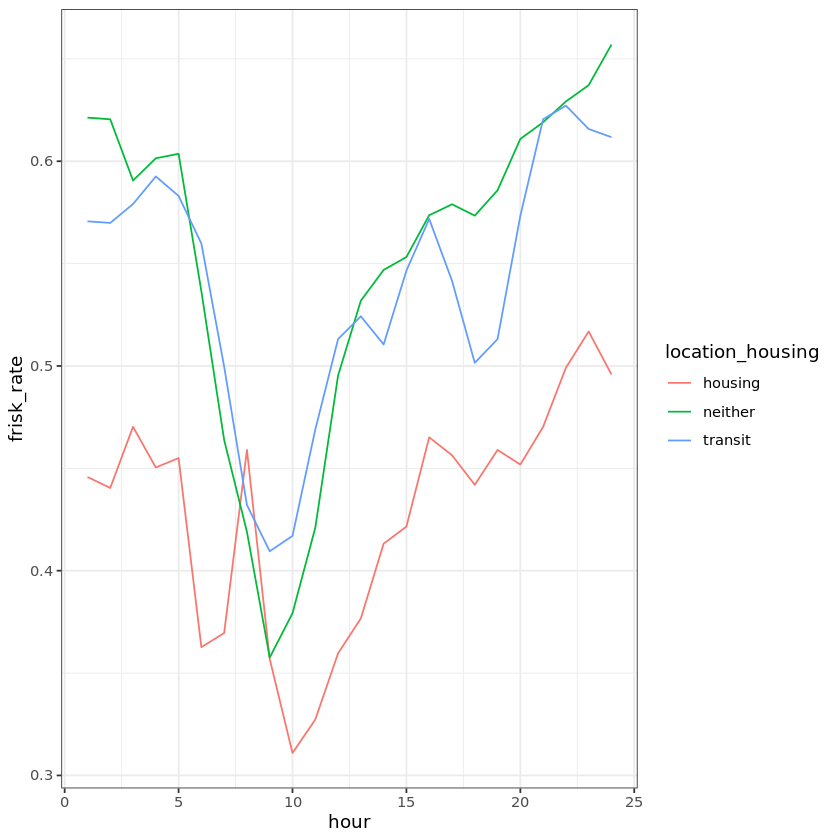

In [30]:
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing)) +
    geom_line()

We can now easily see that frisks are least common around the start of the 
work day, and that they peak around midnight.

Plots reduce the **cognitive burden** of gleaning insights from text. 

> According to a classic [research paper](https://brendans-island.com/blogsource/20170523-Documents/20170603-8611.pdf), humans can process images **60,000** times faster than text.

By the end of this tutorial, you'll be on your way to making clean and effective plots with `R`.

## ⚙️ The mechanics of `ggplot2`

`ggplot2` is a popular and flexible `R` package for plotting. 

To make a basic plot, this all you have to tell `ggplot2`:
- What data should be used?
- What kind of plot would you like (e.g., bar chart, line graph, or histogram)?
- Which columns should be plotted?

Let's see this in action with the `n_stops_by_year` table:

In [31]:
n_stops_by_month = stops %>% 
  group_by(month) %>% 
  summarize(n_stops = n())

n_stops_by_month

month,n_stops
<dbl>,<int>
1,207019
2,193846
3,202052
4,203044
5,199399
6,167311
7,166428
8,169559
9,174400


`ggplot2` in action:

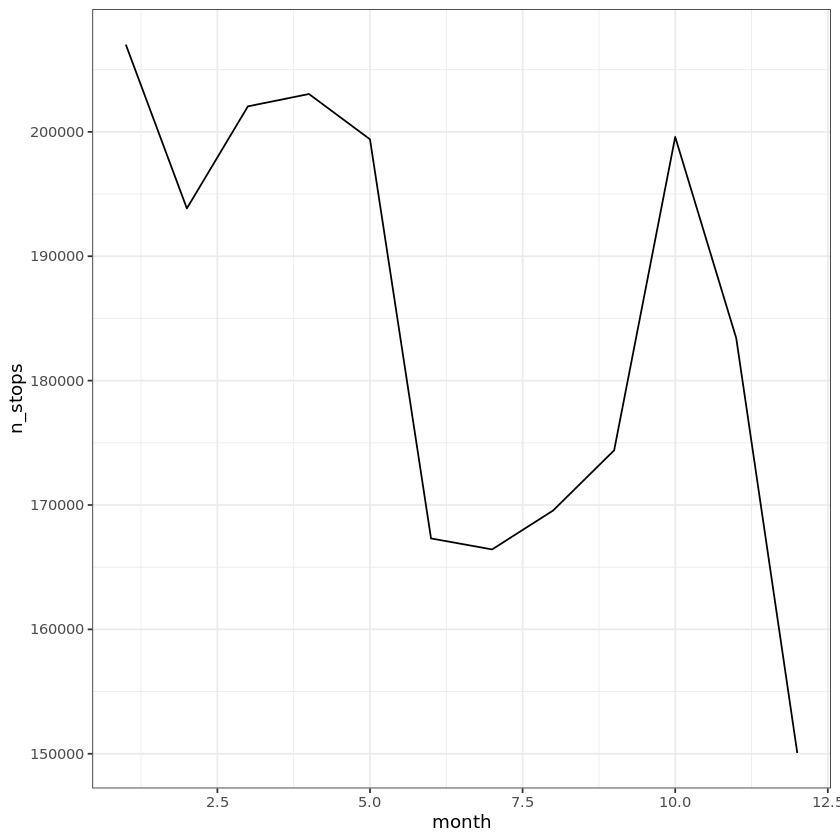

In [32]:
# First argument: the data
# Second argument: the columns to plot on each axis
ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 

    # Here's where we specify the plot type
    geom_line() 

🛠️ Let's break down each piece:

1. The `ggplot()` function **initializes** a blank plot.

2. `n_stops_by_month` is our data.

3. The `aes()` function makes a **mapping** between columns and **aesthetics** (i.e., features) of our plot.

4. `aes(x = month, y = n_stops)` tells `ggplot2` that we should plot the `month` column on the x-axis, and the `n_stops` column on the y-axis.

5. The addition (`+`) of `geom_line` tells `ggplot2` to construct a line graph.

❗❗Important note❗❗: `ggplot2` uses addition `+` instead of the pipe `%>%` to chain functions. 

> 🏛️ This is for historical reasons: `ggplot2` was created before the pipe `%>%`!

## 🚀 Exercise

1. Modify the plotting code to create a bar chart, a scatterplot, and a smoothed curve. 

> You may find the functions `geom_col()`, `geom_point()`, and `geom_smooth()` helpful.

2. Try adding more than one `geom` function to your code. What happens?

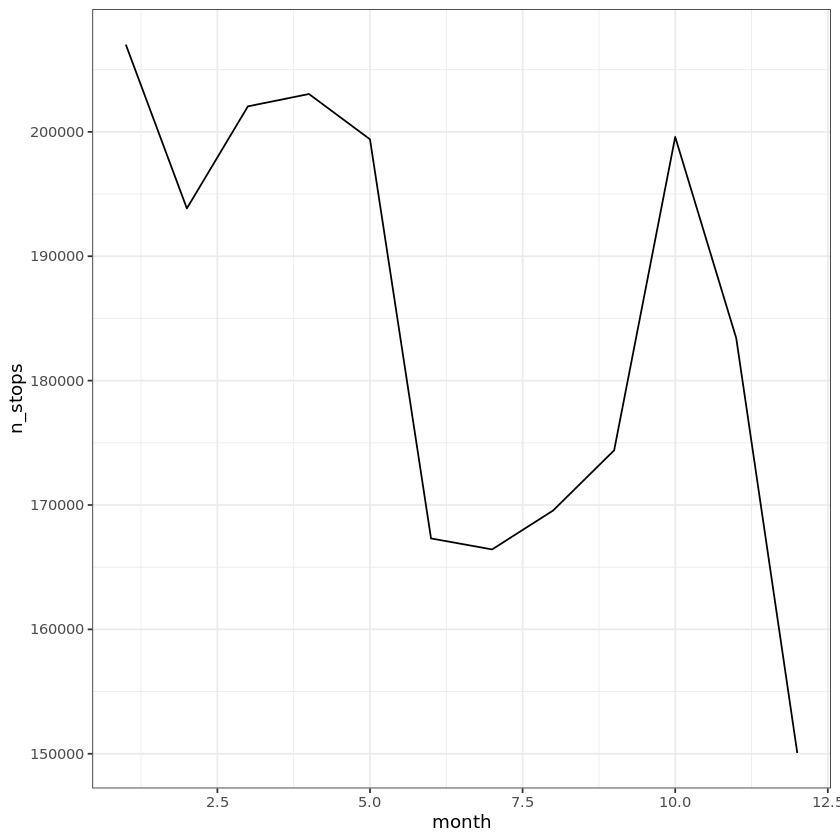

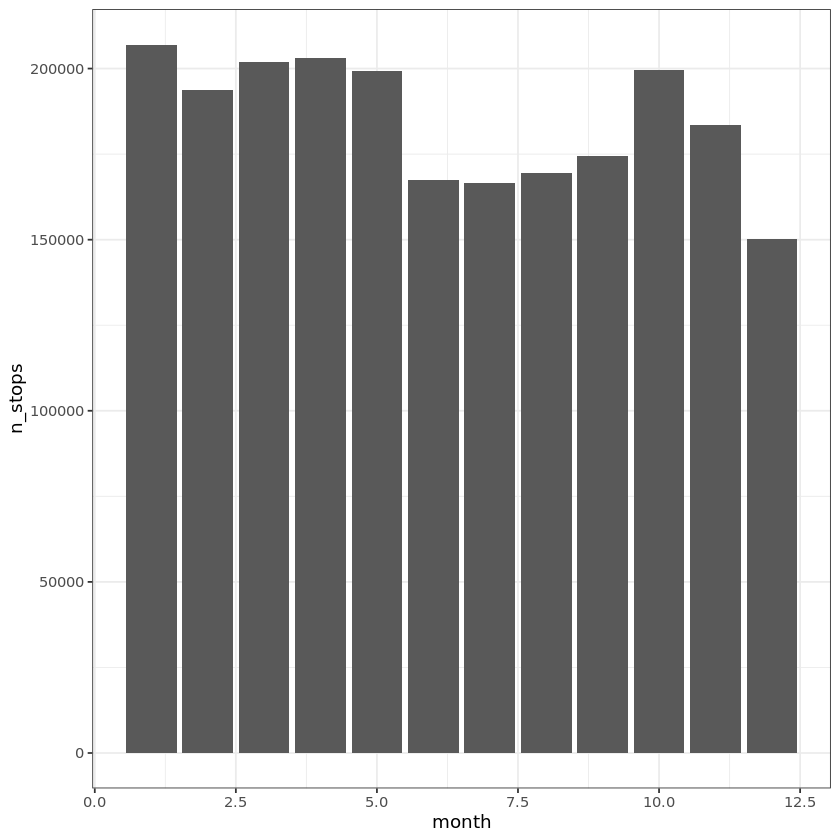

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


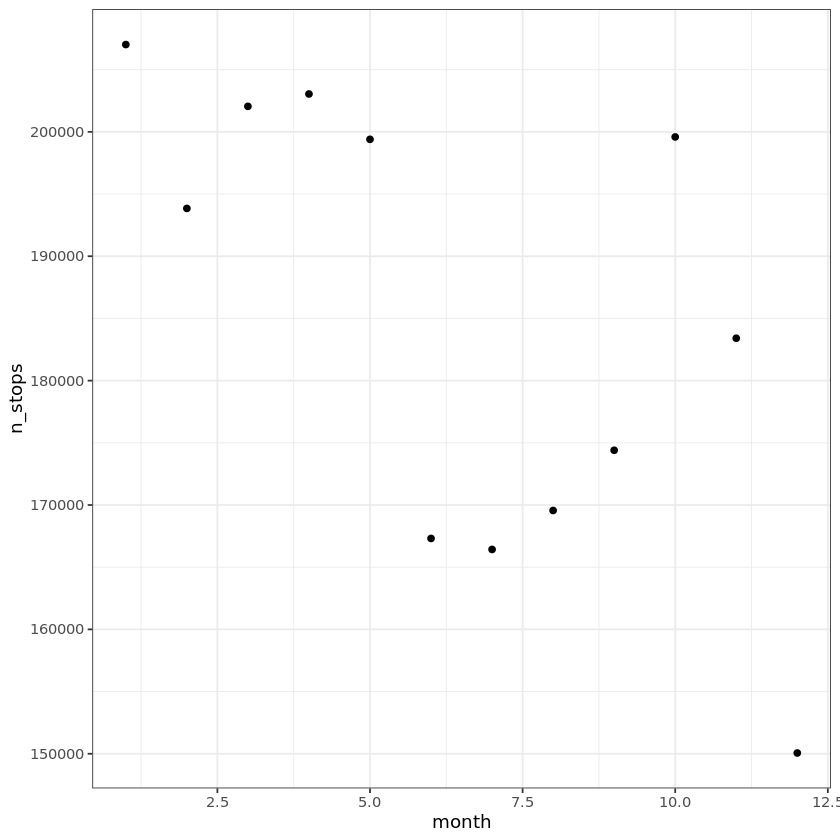

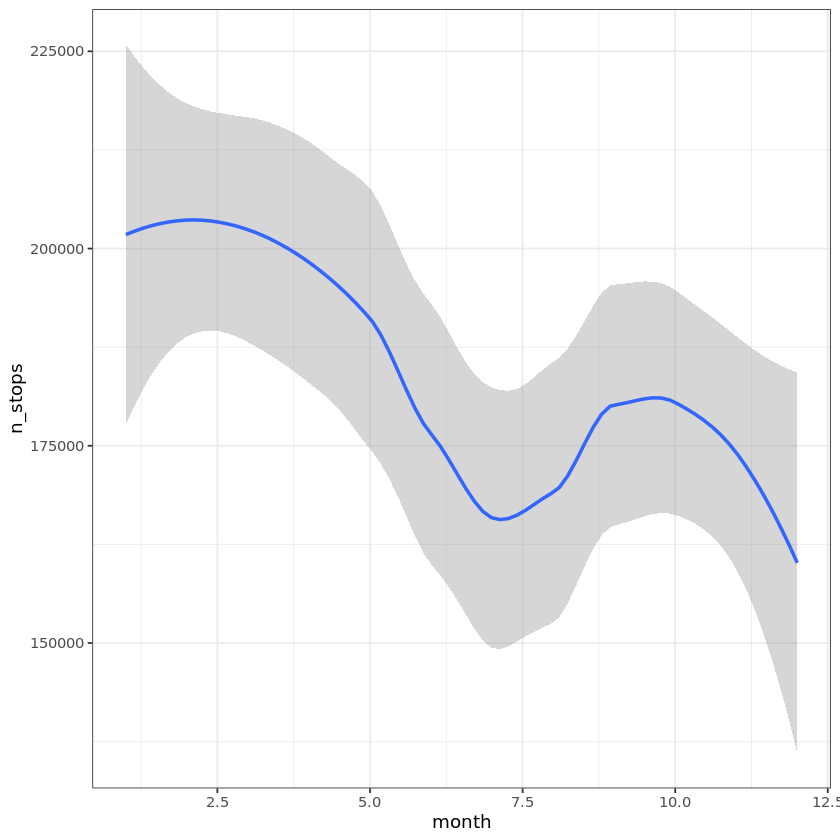

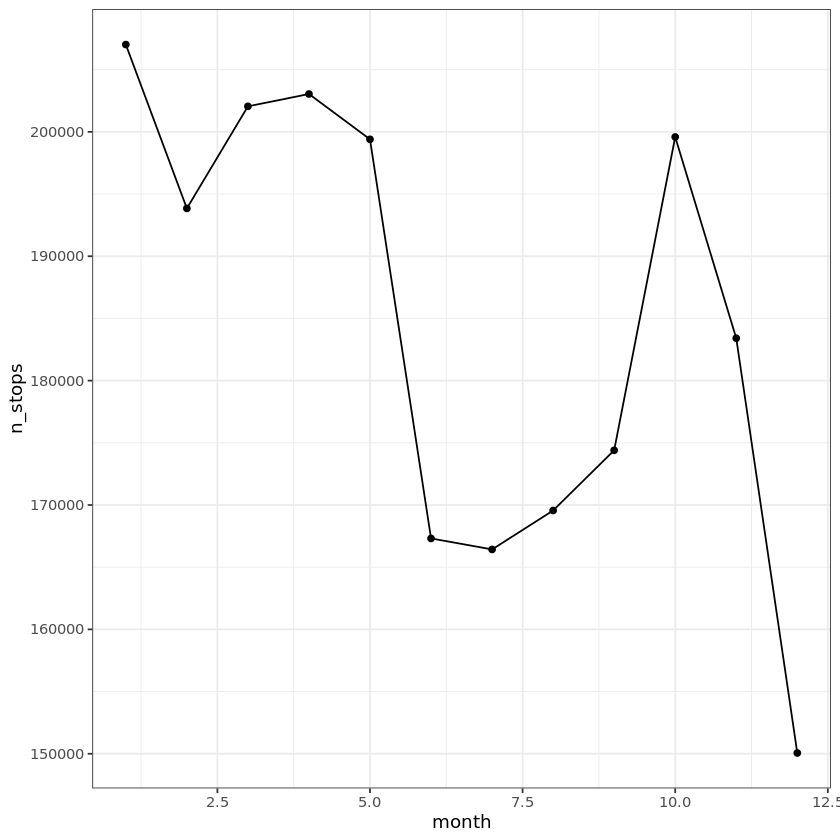

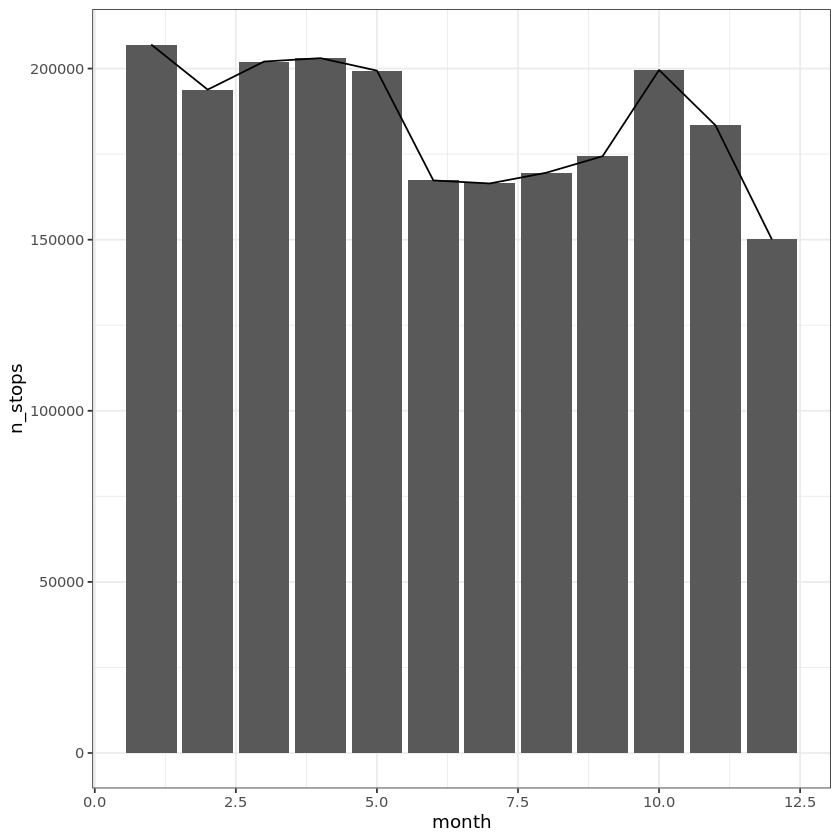

In [33]:
# First argument: data
# Second argument: columns to plot on each axis
ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 

    # Here's where we specify the plot type
    geom_line() 

# START

# 1.

ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 
    geom_col()

ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 
    geom_point()

ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 
    geom_smooth()

# 2. The geometries are layered on top of one another!

ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 
    geom_line() +
    geom_point()

ggplot(n_stops_by_month, aes(x = month, y = n_stops)) + 
    geom_col() +
    geom_line()

# END

## 🎨 Adding <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font> to our plot

So far, we've used two columns from our data. So, our plots are 2-dimensional (2D). 

How could we show data from more than one column?
- Number of stops **by race** for each year
- Number of stops **by gender** for each year
- Number of stops **by age** for each year

One option is a [3D plot](https://c3d.libretexts.org/CalcPlot3D/index.html). They exist, but they can be hard to read, and hard to generate. 

> 📰 For example, how would you put a 3D plot on the cover of the New York Times?

How can we add dimensions while keeping our plot 2D? ☀️<font color="red">C</font><font color="blue">O</font><font color="green">L</font><font color="orange">O</font><font color="purple">R</font> ☀️! Or anything else from this list:

- 〰️ Linetype (e.g. dotted or dashed)
- 📈 📉 Multiple 2D plots
- ⚫ Point size 
- And more!

Here's the example from earlier:

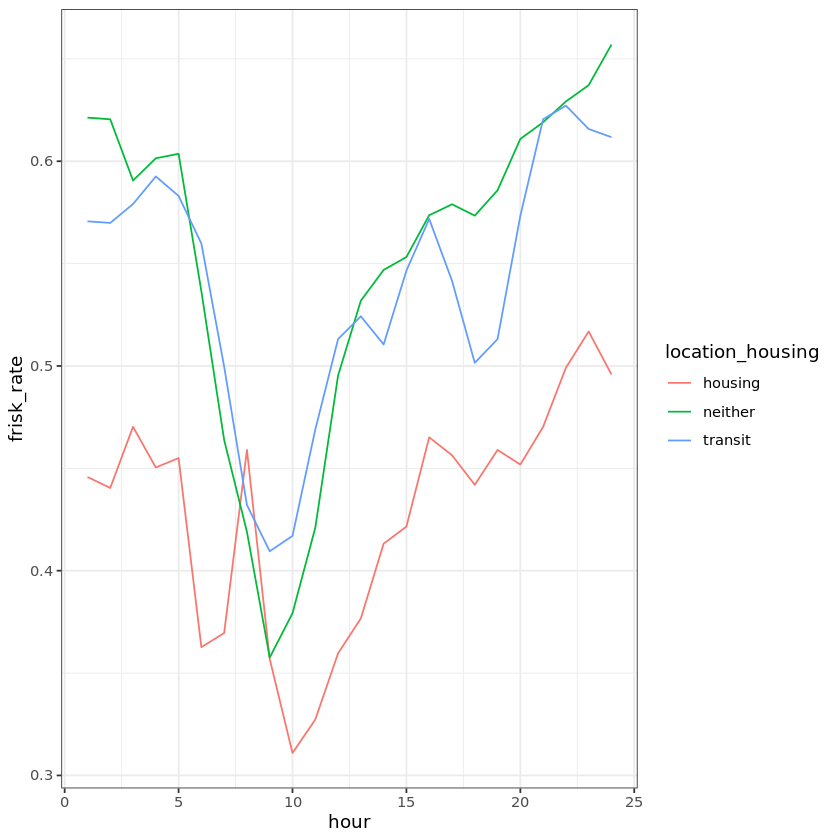

In [34]:
# Change 1: New data. `n_stops_by_age_by_year` was the super long table.
# Change 2: We added `color = age_first_digit`.
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing)) +
    geom_line()

## 🚀 Exercise

1. Modify the plotting code to create a <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font><font color="pink">e</font><font color="brown">d</font> bar chart and scatterplot.

> Think about which type of plot is most informative, and which one is least informative.

2. Instead of mapping `color` to `location_housing`, try the following mappings:

- `linetype` to `location_housing`

- `fill` to `location_housing`

Note: Some mappings may give you errors with certain `geom`'s. For example, does `linetype` make sense for a scatterplot?

3. Make a line chart, but map `color` to `location_housing` **and** map `linetype` to `location_housing`. What happens?



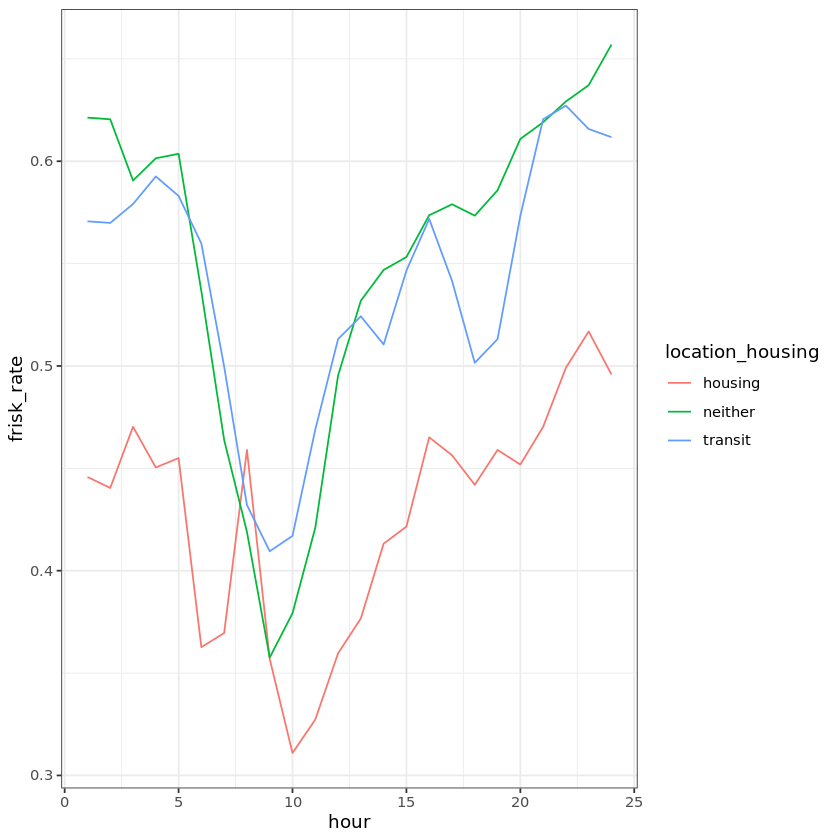

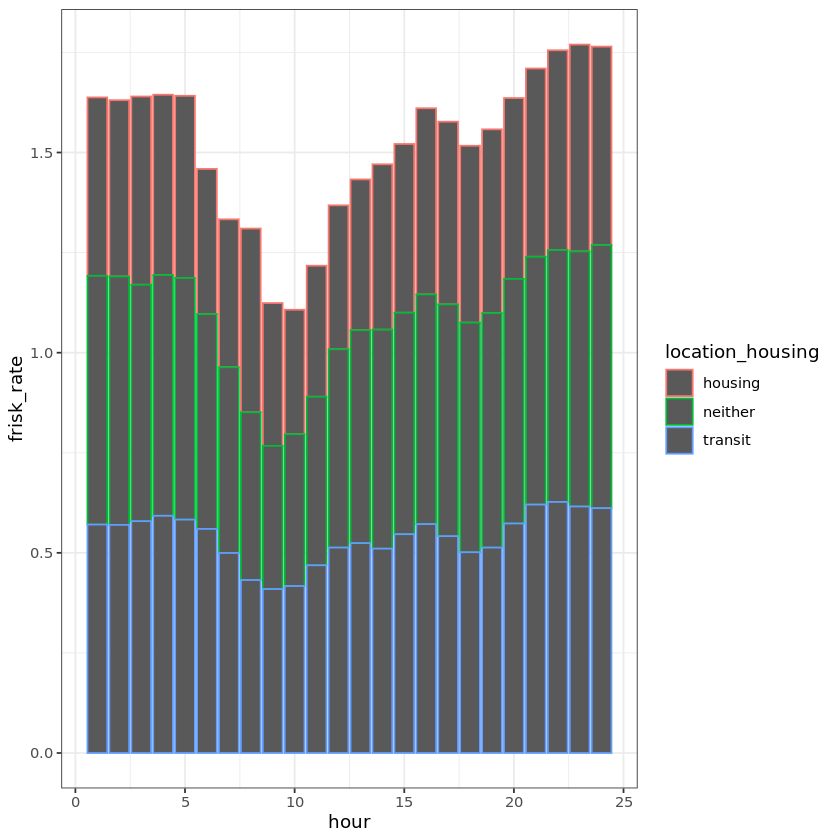

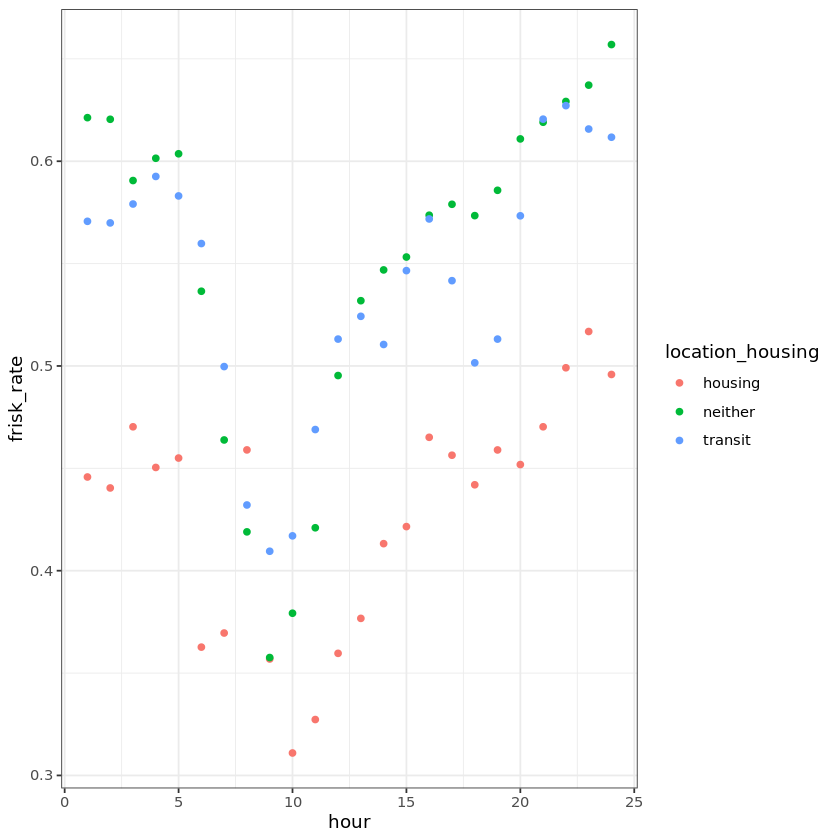

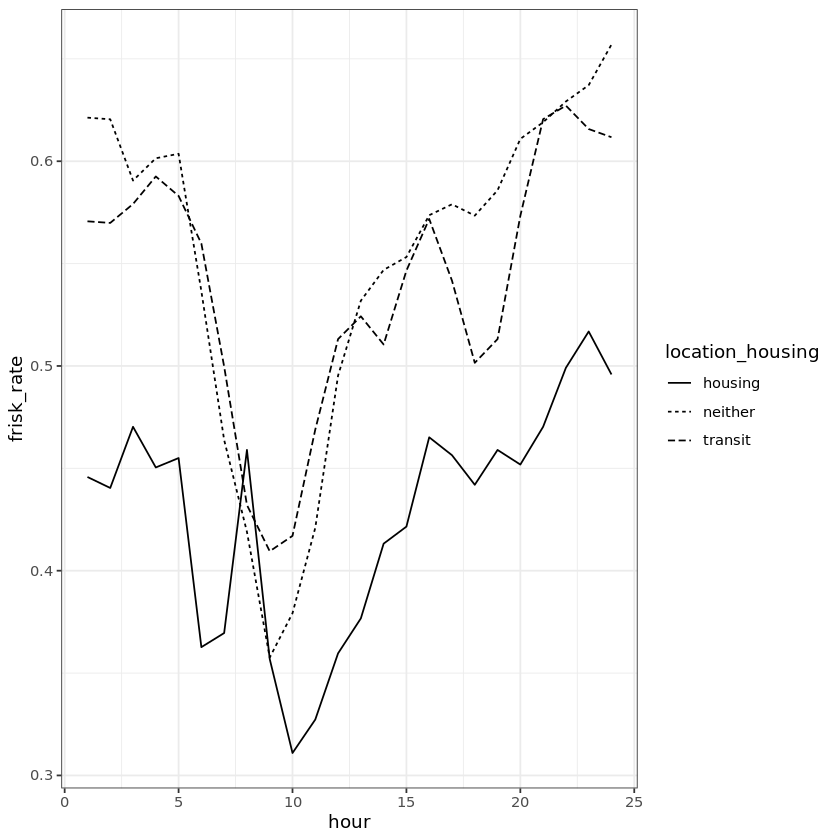

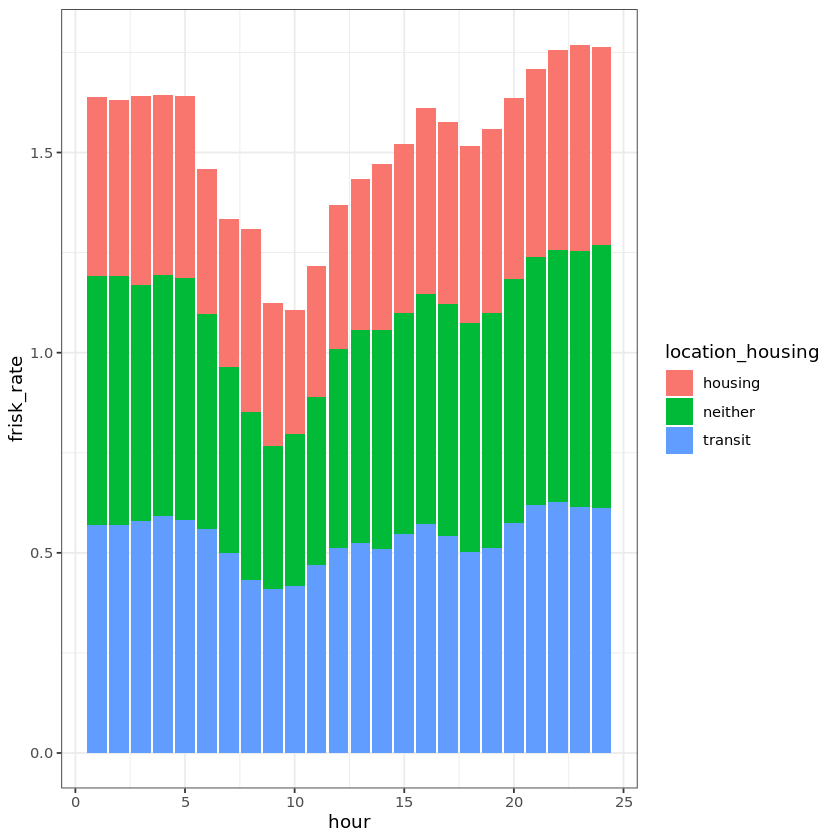

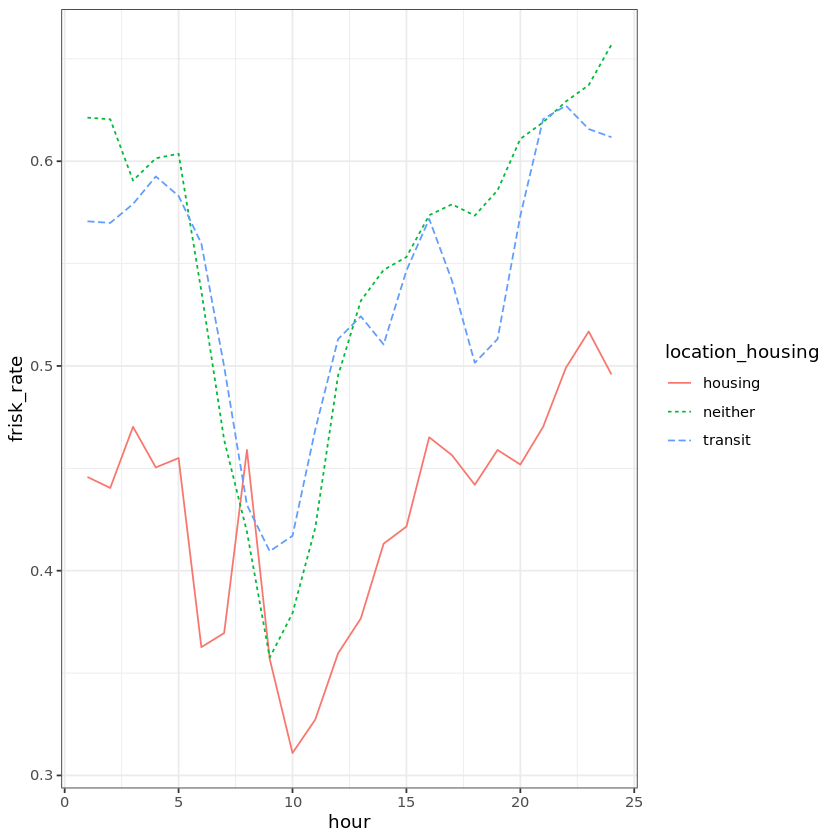

In [35]:
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing)) +
    geom_line()

# START

# 1. The bar chart and scatterplots are hard to read. Line plot is better.

ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing)) +
    geom_col()

ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing)) +
    geom_point()

# 2. 

# After two or three linetypes, it becomes hard to distinguish the lines from
# one another. But, this is great when you can only print in black and white.
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, linetype=location_housing)) +
    geom_line()

# It looks like `fill` controls the color of the bars, while
# `color` controls the outline.
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, fill=location_housing)) +
    geom_col()

# 3. 

# Each line gets its own color AND linetype. 
ggplot(frisk_rate_by_location_and_hour, aes(x=hour, y=frisk_rate, color=location_housing, linetype=location_housing)) +
    geom_line()


# END

### Concluding thoughts on Part 2

`ggplot2` has many additional features and [extension packages](https://exts.ggplot2.tidyverse.org/gallery/) for making useful plots.

> You can see cool examples of all chart types on [this website](https://r-graph-gallery.com/scatterplot.html).

Here are some ways we could clean up our colored line plot to make it more informative:

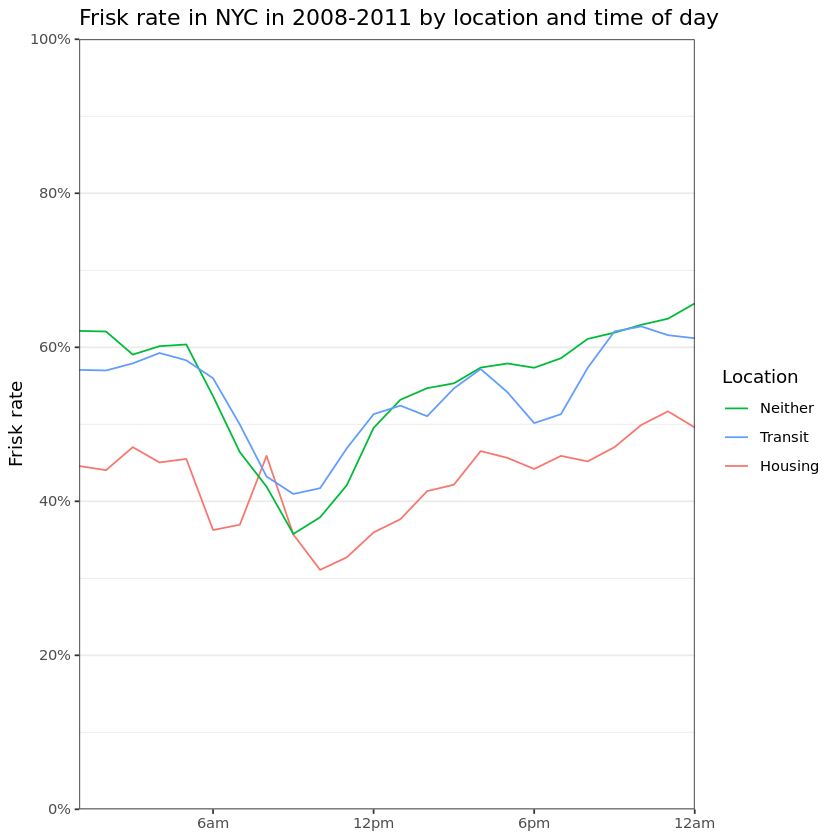

In [36]:
# Piping the data into ggplot with the pipe (%>%)
frisk_rate_by_location_and_hour %>%
    ggplot(aes(x=hour, y=frisk_rate, color=location_housing)) +
        geom_line() +
        # Remove the label from the x axis, and show all the years
        scale_x_continuous(
            name=NULL,
            breaks=c(6, 12, 18, 24),
            labels=c("6am", "12pm", "6pm", "12am"),
            limits=c(1,24),
            expand=c(0,0)
        ) +
        # Label the y axis, and change rates to percent
        scale_y_continuous(
            name="Frisk rate",
            labels=scales::percent_format(accuracy = 1),
            breaks=seq(0, 1, by=0.2),
            limits=c(0,1),
            expand=c(0,0)
        ) +
        # Title the legend
        scale_color_discrete(
            name="Location",
            breaks=c("neither", "transit", "housing"),
            labels=c("Neither", "Transit", "Housing")
        ) +
        # Remove the x axis gridlines
        theme(
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank()
        ) +
        # Give the plot an informative title
        ggtitle(
            "Frisk rate in NYC in 2008-2011 by location and time of day"
        )

The best way to learn how to do something in `ggplot2`? 

Head to Google and search `How to do X in ggplot`!

> Or, as of 2022, ask ChatGPT!